In [1]:
import pandas as pd 
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [2]:
df.shape

(5110, 12)

In [3]:
df.drop(['id'],axis='columns',inplace=True)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [5]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
df.dropna(inplace=True)
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [7]:
df.groupby('stroke')['heart_disease'].count()

stroke
0    4700
1     209
Name: heart_disease, dtype: int64

In [8]:
count_0,count_1 = df.stroke.value_counts()
count_0,count_1 

(4700, 209)

In [9]:
df1_class_1 = df[df.stroke == 1]
df1_class_0 = df[df.stroke == 0].sample(count_1)

In [10]:
df1 = pd.concat([df1_class_1,df1_class_0],axis=0)
df1.shape

(418, 11)

In [11]:
import matplotlib.pyplot as plt

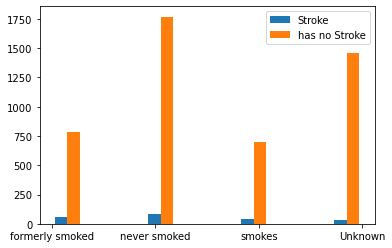

In [12]:
plt.hist([df[df.stroke == 1].smoking_status,df[df.stroke == 0].smoking_status],label=['Stroke','has no Stroke'])
plt.legend()

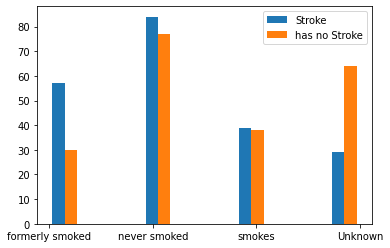

In [13]:
plt.hist([df1[df1.stroke == 1].smoking_status,df1[df1.stroke == 0].smoking_status],label=['Stroke','has no Stroke'])
plt.legend()

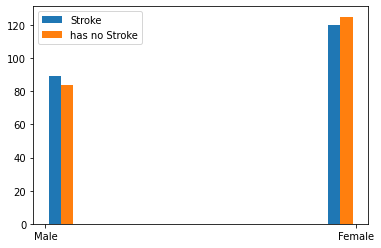

In [14]:
plt.hist([df1[df1.stroke == 1].gender,df1[df1.stroke == 0].gender],label=['Stroke','has no Stroke'])
plt.legend()

In [15]:
df1.ever_married.unique()

array(['Yes', 'No'], dtype=object)

In [16]:
df1.ever_married = df1.ever_married.apply(lambda x : 1 if x=='Yes' else 0)

In [17]:
df1.ever_married.unique()

array([1, 0], dtype=int64)

In [18]:
jobs = df1.work_type.unique()

In [19]:
dummies = pd.get_dummies(df1.work_type,drop_first=True)

In [20]:
df1 = pd.concat([df1,dummies],axis=1)

In [21]:
df1.Residence_type.unique()

array(['Urban', 'Rural'], dtype=object)

In [22]:
df1.Residence_type = df1.Residence_type.apply(lambda x : 1 if x=='Urban' else 0)

In [23]:
df1.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Private,Self-employed,children
0,Male,67.0,0,1,1,Private,1,228.69,36.6,formerly smoked,1,1,0,0
2,Male,80.0,0,1,1,Private,0,105.92,32.5,never smoked,1,1,0,0
3,Female,49.0,0,0,1,Private,1,171.23,34.4,smokes,1,1,0,0
4,Female,79.0,1,0,1,Self-employed,0,174.12,24.0,never smoked,1,0,1,0
5,Male,81.0,0,0,1,Private,1,186.21,29.0,formerly smoked,1,1,0,0


In [24]:
df.gender.unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [25]:
df.gender.value_counts()

Female    2897
Male      2011
Other        1
Name: gender, dtype: int64

In [26]:
df1.gender = df1.gender.apply(lambda x: 0 if ((x == 'Female') or (x == 'Other')) else 1)

In [27]:
df1.smoking_status.unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [28]:
df1.smoking_status.value_counts()

never smoked       161
Unknown             93
formerly smoked     87
smokes              77
Name: smoking_status, dtype: int64

In [29]:
dummies = pd.get_dummies(df1.smoking_status,drop_first=True)
df1 = pd.concat([df1,dummies],axis=1)

In [30]:
df1.shape

(418, 17)

In [31]:
df1.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Private,Self-employed,children,formerly smoked,never smoked,smokes
0,1,67.0,0,1,1,Private,1,228.69,36.6,formerly smoked,1,1,0,0,1,0,0
2,1,80.0,0,1,1,Private,0,105.92,32.5,never smoked,1,1,0,0,0,1,0
3,0,49.0,0,0,1,Private,1,171.23,34.4,smokes,1,1,0,0,0,0,1
4,0,79.0,1,0,1,Self-employed,0,174.12,24.0,never smoked,1,0,1,0,0,1,0
5,1,81.0,0,0,1,Private,1,186.21,29.0,formerly smoked,1,1,0,0,1,0,0


In [33]:
df1.drop(['work_type','smoking_status'],axis='columns',inplace=True)

In [34]:
df1.dtypes

gender                 int64
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int64
Residence_type         int64
avg_glucose_level    float64
bmi                  float64
stroke                 int64
Private                uint8
Self-employed          uint8
children               uint8
formerly smoked        uint8
never smoked           uint8
smokes                 uint8
dtype: object

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df1.drop(['stroke'],axis='columns'),df1.stroke,test_size=0.2,stratify=df1.stroke)

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
model = LogisticRegression()

In [41]:
model.fit(X_train,y_train)

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [42]:
model.score(X_test,y_test)

0.7261904761904762

# method 2: over sampling

In [43]:
count_0 , count_1

(4700, 209)

In [45]:
df2_count_1 = df[df.stroke==1].sample(count_0,replace=True)
df2_count_0 = df[df.stroke==0]

In [46]:
df2 = pd.concat([df2_count_1,df2_count_0],axis=0)
df2.shape

(9400, 11)

In [51]:
def covert(df1):
    df1.ever_married = df1.ever_married.apply(lambda x : 1 if x=='Yes' else 0)
    dummies = pd.get_dummies(df1.work_type,drop_first=True)
    df1 = pd.concat([df1,dummies],axis=1)
    df1.Residence_type = df1.Residence_type.apply(lambda x : 1 if x=='Urban' else 0)
    df1.gender = df1.gender.apply(lambda x: 0 if ((x == 'Female') or (x == 'Other')) else 1)
    dummies = pd.get_dummies(df1.smoking_status,drop_first=True)
    df1 = pd.concat([df1,dummies],axis=1)
    df1.drop(['work_type','smoking_status'],axis='columns',inplace=True)
    return df1

In [48]:
df2.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [52]:
df2 = covert(df2)
df2.dtypes

gender                 int64
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int64
Residence_type         int64
avg_glucose_level    float64
bmi                  float64
stroke                 int64
Never_worked           uint8
Private                uint8
Self-employed          uint8
children               uint8
formerly smoked        uint8
never smoked           uint8
smokes                 uint8
dtype: object

In [53]:
df2.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,Never_worked,Private,Self-employed,children,formerly smoked,never smoked,smokes
92,0,57.0,0,0,0,1,68.02,37.5,1,0,0,1,0,0,1,0
63,0,45.0,0,0,0,0,93.72,30.2,1,0,1,0,0,1,0,0
143,0,69.0,1,1,0,1,72.17,36.8,1,0,0,1,0,0,1,0
42,1,82.0,0,1,0,1,144.90,26.4,1,0,1,0,0,0,0,1
151,1,68.0,0,1,0,1,223.83,31.9,1,0,1,0,0,1,0,0


In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df2.drop(['stroke'],axis='columns'),df2.stroke,test_size=0.3,stratify=df2.stroke)

In [56]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7726950354609929

In [57]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.7439716312056738

In [58]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9918439716312056

In [60]:
import pickle
with open('model_pickle','wb') as file:
    pickle.dump(model,file)

In [62]:
len(X_test.columns)

15

In [63]:
X_test.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'Residence_type', 'avg_glucose_level', 'bmi', 'Never_worked', 'Private',
       'Self-employed', 'children', 'formerly smoked', 'never smoked',
       'smokes'],
      dtype='object')

In [68]:
work = ['Never_worked','Private','Self-employed','Self-employed']
def getindex(array,string):
    for i in range(len(array)):
        if array[i] == string:
            return i
    return None
getindex(work,'Private')

1

In [77]:
def predict(gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,work_type,smoking_status):
    import numpy as np
    work = ['Never_worked','Private','Self-employed','Self-employed']
    smoking = ['formerly smoked', 'never smoked','smokes']
    with open('model_pickle','rb') as file:
        mp = pickle.load(file)
    x = np.zeros(15)
    if gender == 'male': x[0]=1 
    else:x[0]=0
    x[1]=age
    x[2] = hypertension
    x[3] = heart_disease
    if ever_married == 'Yes':x[4]=1 
    else:x[4]=0
    if Residence_type == 'Urban':x[5]=1 
    else:x[5]=0
    x[6] = avg_glucose_level
    x[7] = bmi
    work_index =getindex(work,work_type)
    smok_index = getindex(smoking,smoking_status)
    if(work_index):x[8+work_index] = 1
    if(smok_index):x[12+smok_index] = 1
    print(x)
    return mp.predict([x])

In [78]:
predict('Female',61,0,1,'Yes','Rural',120.46,36.8,'Govt_job','smokes')

[  0.    61.     0.     1.     1.     0.   120.46  36.8    0.     0.
   0.     0.     0.     0.     1.  ]


array([1], dtype=int64)

In [79]:
predict('male',53,0,0,'Yes','Rural',120.46,36.8,'Private','formerly smoked')

[  1.    53.     0.     0.     1.     0.   120.46  36.8    0.     1.
   0.     0.     0.     0.     0.  ]


array([0], dtype=int64)